In [2]:
from qiskit import *

In [4]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

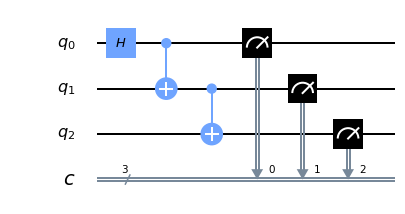

In [5]:
circuit.draw(output='mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [10]:
from qiskit.visualization import plot_histogram

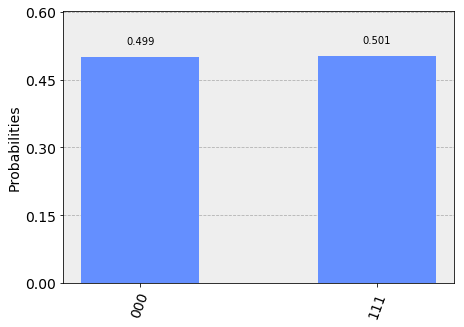

In [11]:
plot_histogram(sim_result.get_counts(circuit))

In [3]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-internal')
# device = provider.get_backend('ibmq_almaden')

provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [13]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5d8c4ade29dcfd0011e55b17
Job Status: job has successfully run


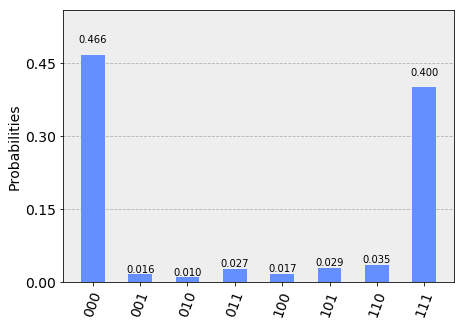

In [14]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [15]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [16]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')

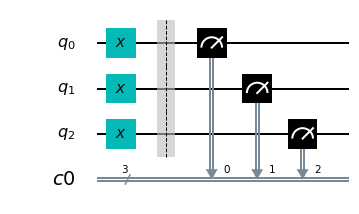

In [19]:
cal_circuits[7].draw(output='mpl')

In [20]:
len(cal_circuits)

8

In [41]:
cal_job = execute(cal_circuits,
             backend=device,
             shots=8192,
             optimization_level=0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5d8c51d979e8740011f3dbfe
Job Status: job has successfully run


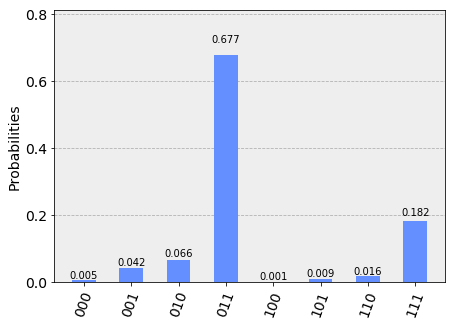

In [42]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [43]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

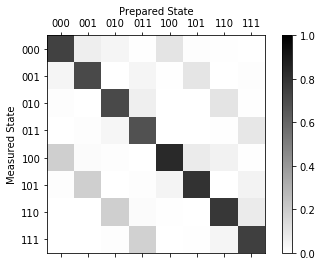

In [44]:
meas_fitter.plot_calibration()

In [45]:
meas_filter = meas_fitter.filter

In [46]:
mitigated_result = meas_filter.apply(device_result)

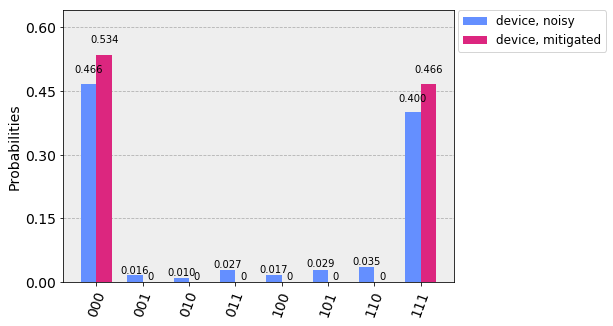

In [48]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], 
               legend=['device, noisy', 'device, mitigated'])

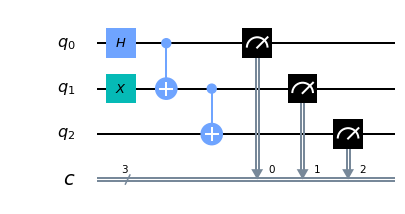

In [56]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')


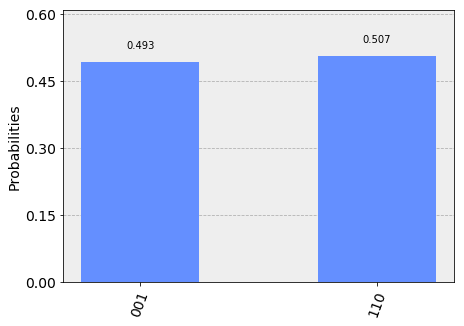

In [57]:
plot_histogram(
    execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2)
)

In [58]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

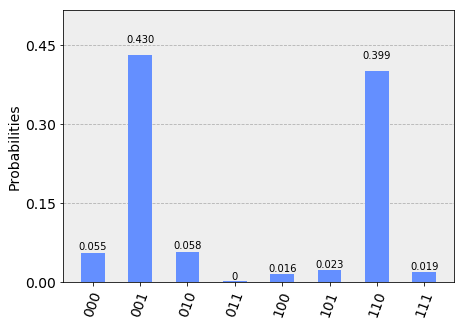

In [59]:
plot_histogram(device_counts_2)

In [62]:
mitigated_counts_2 = meas_filter.apply(device_counts_2)

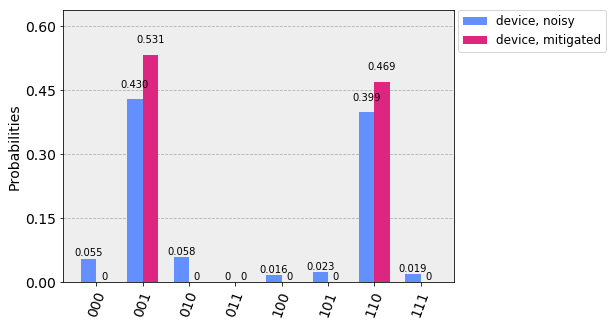

In [65]:
plot_histogram([device_counts_2, mitigated_counts_2], legend=['device, noisy','device, mitigated'])